In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pylab import rcParams




In the above code block , we have imported all the required libraries for the Logistic Regression model we are going to prepare


# Calling the Kaggle Framingham Dataset and Printing


In [5]:

df=pd.read_csv('framingham.csv')
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

#  Exploratory Data Analysis and Data Cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
male               3658 non-null int64
age                3658 non-null int64
education          3658 non-null float64
currentSmoker      3658 non-null int64
cigsPerDay         3658 non-null float64
BPMeds             3658 non-null float64
prevalentStroke    3658 non-null int64
prevalentHyp       3658 non-null int64
diabetes           3658 non-null int64
totChol            3658 non-null float64
sysBP              3658 non-null float64
diaBP              3658 non-null float64
BMI                3658 non-null float64
heartRate          3658 non-null float64
glucose            3658 non-null float64
TenYearCHD         3658 non-null int64
dtypes: float64(9), int64(7)
memory usage: 645.8 KB
None
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   

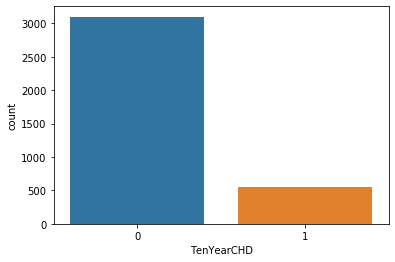

In [7]:
print(df.info())
df=df.dropna()
print(df)
sb.countplot(df['TenYearCHD'])# this is to check wether the dataset is imbalanced or balanced
zero_df=df[df['TenYearCHD']==0]
one_df=df[df['TenYearCHD']==1]
print(zero_df.shape)
print(one_df.shape)
# after this you will observe that we have 3000 rows with output 1 and around 557 rows with output 0 , therefore the dataset is highly imbalanced
zero_df=zero_df[:557]
print(zero_df.shape)
# so now we have a balanced dataset at hand
df=zero_df
df=df.append(one_df)
print(df.shape)
print(df.columns)

# Splitting , Training and Testing

(835, 12)
(279, 12)
0.6227544910179641
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       136
           1       0.69      0.71      0.70       143

    accuracy                           0.68       279
   macro avg       0.68      0.68      0.68       279
weighted avg       0.68      0.68      0.68       279



c:\users\syed ishtiyaq ahmed\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\syed ishtiyaq ahmed\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


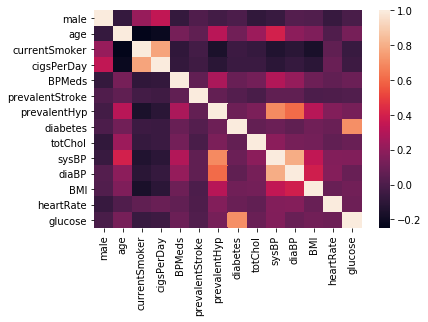

In [12]:
X=df[['male', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']].values
y=df[['TenYearCHD']].values
#therefore , we are assigning our features and label as X and Y respectively
sb.heatmap(df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']].corr())
# the heatmap generated helps us to understand the level of correlation between  the different features of the dataset.
# removing highly correlated features from the dataset may increase or decrease the accuracy of our model , but the accuracy value will be correct and genuine
# if the overall accuracy decreases , it means previously we were "overfitting" the model
X_train,X_test,y_train,y_test=train_test_split(X,y)
#we are splitting the dataset into training and testing data
print(X_train.shape)
print(X_test.shape)
# usually the training-testing split is 80%-20% but we can always change
#fitting the training data to our model
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)
print(LogReg.score(X_train,y_train))
# printing the accuracy of our model on the train data
y_pred=LogReg.predict(X_test)# predicting the classifications on the X_test data , this data has not been seen by our model before
print(classification_report(y_test,y_pred))# classification report displaying the precision,recall,F1 and support scores for the model

